In [23]:
from deep_dating.networks import DatingCNN
from deep_dating.datasets import DatingDataLoader, DatasetName, SetType
import torch
import torch.nn as nn
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

In [20]:
model = DatingCNN()
model.load_state_dict(torch.load("runs/Dec21-16-31-47/model_epoch_8.pt"))
model.base_model.fc = nn.Identity()
model.eval()

DatingCNN(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05,

In [29]:
val_loader = DatingDataLoader(DatasetName.MPS, SetType.VAL, model)

all_outputs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in tqdm(val_loader):

        labels = labels.unsqueeze(1)
        all_labels.append(labels)
        
        outputs = model(inputs)
        all_outputs.append(outputs)

100%|██████████| 1204/1204 [1:16:27<00:00,  3.81s/it]


In [70]:
# new_outputs = []
# for x in all_outputs:
#     all_outputs.append(x.detach().cpu().numpy())
all_outputs_np = np.concatenate(all_outputs)
all_outputs_np.shape

(19251, 2048)

In [72]:
all_labels_np = np.concatenate(all_labels)
print(all_labels_np.shape)
np.save("feats.npy", all_labels_np, allow_pickle=True)

(19251, 1)


In [32]:
pca = PCA(n_components=2048)
reduced_np = StandardScaler().fit_transform(all_outputs_np)
reduction = pca.fit_transform(reduced_np)

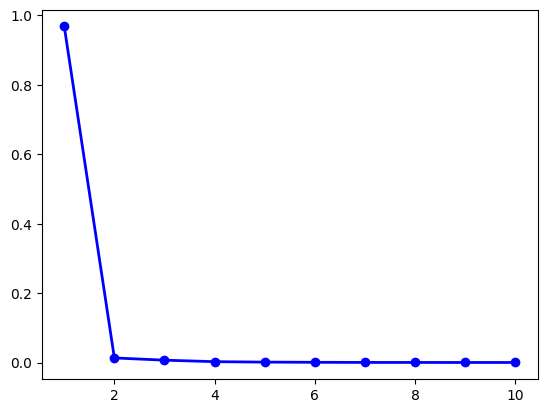

[9.6768039e-01 1.3520850e-02 7.1046189e-03 2.7738193e-03 1.5293220e-03
 9.8083646e-04 6.0386187e-04 5.3859310e-04 4.7997106e-04 4.6434533e-04]


In [84]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values[:10], pca.explained_variance_ratio_[:10], 'o-', linewidth=2, color='blue')
plt.show()
print(pca.explained_variance_ratio_[:10])

In [56]:
labels_ = list(np.concatenate(all_labels_np).astype(int))
labels_

[1425,
 1350,
 1550,
 1450,
 1550,
 1375,
 1425,
 1550,
 1300,
 1500,
 1450,
 1500,
 1450,
 1450,
 1475,
 1500,
 1350,
 1550,
 1475,
 1475,
 1450,
 1500,
 1375,
 1400,
 1325,
 1450,
 1550,
 1475,
 1375,
 1550,
 1400,
 1400,
 1475,
 1375,
 1475,
 1500,
 1325,
 1475,
 1375,
 1550,
 1400,
 1525,
 1375,
 1425,
 1375,
 1550,
 1500,
 1525,
 1350,
 1450,
 1450,
 1400,
 1525,
 1500,
 1325,
 1325,
 1350,
 1525,
 1450,
 1500,
 1550,
 1550,
 1475,
 1400,
 1500,
 1425,
 1375,
 1425,
 1375,
 1450,
 1475,
 1475,
 1475,
 1475,
 1500,
 1450,
 1400,
 1425,
 1475,
 1550,
 1525,
 1375,
 1500,
 1400,
 1400,
 1425,
 1450,
 1550,
 1475,
 1500,
 1425,
 1450,
 1400,
 1450,
 1550,
 1450,
 1500,
 1375,
 1450,
 1475,
 1525,
 1475,
 1350,
 1550,
 1450,
 1500,
 1450,
 1475,
 1375,
 1550,
 1350,
 1450,
 1325,
 1450,
 1400,
 1375,
 1500,
 1425,
 1550,
 1550,
 1525,
 1300,
 1475,
 1475,
 1525,
 1500,
 1450,
 1450,
 1475,
 1425,
 1525,
 1375,
 1500,
 1400,
 1475,
 1550,
 1475,
 1475,
 1475,
 1525,
 1450,
 1375,
 1525,

[(0.7972318339100346, 0.20092272202998845, 0.3008073817762399), (0.9139561707035756, 0.36239907727797, 0.27935409457900806), (0.9748558246828143, 0.5574009996155325, 0.32272202998846594), (0.9934640522875817, 0.7477124183006535, 0.4352941176470587), (0.9966935793925413, 0.8975009611687812, 0.5770857362552863), (0.998077662437524, 0.9992310649750096, 0.7460207612456747), (0.9173394848135333, 0.9669357939254134, 0.6200692041522493), (0.7477124183006538, 0.8980392156862746, 0.6274509803921569), (0.5273356401384084, 0.8106113033448674, 0.6452133794694349), (0.3280276816608997, 0.6805074971164936, 0.6802768166089965), (0.2265282583621684, 0.4938869665513264, 0.7224913494809688)]


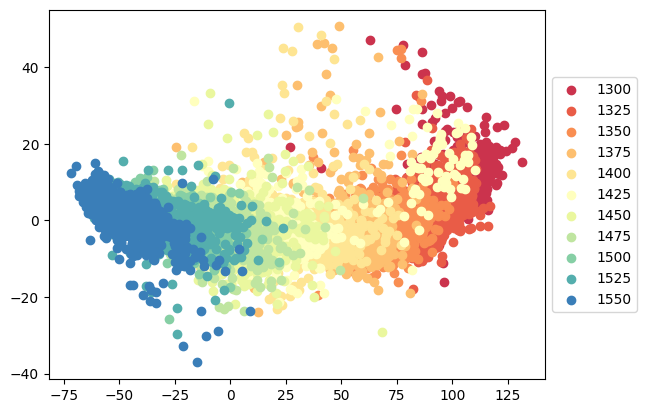

In [85]:
unique = list(np.unique(all_labels_np).astype(int))
colors = sns.color_palette('Spectral', n_colors=11)
print(colors)

dict_ = {}

for i, x in enumerate(labels_):
    val = reduction[i, 0], reduction[i, 1], reduction[i, 2]
    if x not in dict_:
        dict_[x] = [val]
    else:
        dict_[x].append(val)

keys = sorted(dict_.keys())
for i, (key) in enumerate(keys):
    val = dict_[key]
    arr = np.array(val)
    plt.scatter(arr[:, 0], arr[:, 1], color=colors[i], label=str(key))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()